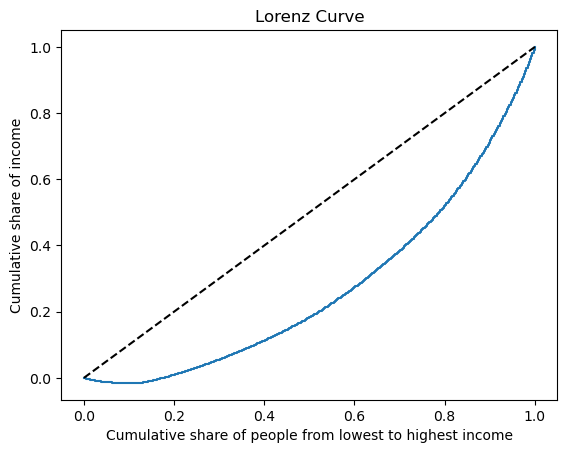

year
0      0.473477
1      0.483487
2      0.524661
3      0.503969
4      0.523583
         ...   
106    0.459274
107    0.459072
108    0.458743
109    0.457654
110    0.457844
Name: income, Length: 111, dtype: float64


In [16]:
import numpy as np
import matplotlib.pyplot as plt

def gini_coefficient(income):
    sorted_income = np.sort(income)
    n = len(income)
    cumulative_income = np.cumsum(sorted_income)
    gini = (2 * np.sum((np.arange(1, n + 1) * sorted_income)) - (n + 1) * cumulative_income[-1]) / (n * cumulative_income[-1])
    return gini

def plot_lorenz_curve(income):
    sorted_income = np.sort(income)
    n = len(income)
    cumulative_income = np.cumsum(sorted_income)
    cumulative_income = np.insert(cumulative_income, 0, 0)
    lorenz_curve = cumulative_income / cumulative_income[-1]
    plt.plot(np.linspace(0, 1, n + 1), lorenz_curve, drawstyle='steps-post')
    plt.plot([0, 1], [0, 1], color='k', linestyle='--')
    plt.xlabel('Cumulative share of people from lowest to highest income')
    plt.ylabel('Cumulative share of income')
    plt.title('Lorenz Curve')
    plt.show()

# Remove 'child' profession from the dataframe
df = df[df['profession'] != 'child']

# Plot the Lorenz curve for the last year in the dataset
last_year_income = df[df['year'] == df['year'].max()]['income']
plot_lorenz_curve(last_year_income)

# Recalculate the Gini coefficient for each year excluding 'child' profession and negative incomes
gini_per_year = df.groupby('year')['income'].apply(gini_coefficient)
print(gini_per_year)
gini_per_year.to_csv('gini-all.csv', header=True)


In [10]:
gini_per_year.to_csv('gini-all.csv', header=True)